<a href="https://colab.research.google.com/github/kostas696/python_stuff/blob/main/The_Game_of_Life.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import matplotlib.pyplot as plt

In [37]:
class GameOfLife(object):

    def __init__(self, x_dim, y_dim):
        '''
        Initializes a GameOfLife object with a grid of specified dimensions.

        Parameters:
        x_dim (int): The number of rows in the grid.
        y_dim (int): The number of columns in the grid.

        Returns:
        None
        '''
        self.life_grid = [[0 for _ in range(y_dim)] for _ in range(x_dim)]

    def get_grid(self):
        '''
        Returns the current state of the game grid.

        Returns:
        list: A 2D list representing the game grid with 1s for live cells and 0s for dead cells.
        '''
        return self.life_grid

    def print_grid(self):
        '''
        Prints the current state of the game grid in a human-readable format.

        Parameters:
        None

        Returns:
        None
        '''
        for row in self.life_grid:
            for cell in row:
                print(cell, end=' ')
            print("\n" + "-" * (len(row) * 2 - 1))

    def populate_grid(self, coord):
        '''
        Populates the game grid with live cells at the specified coordinates.

        Parameters:
        coord (list of tuples): A list of 2D coordinates, each represented as a tuple (row, column),
                                where live cells should be placed.

        Returns:
        list: The updated life_grid with the new live cells.
        '''
        for (row, col) in coord:
            self.life_grid[row][col] = 1
        return self.life_grid

    def make_step(self):
        '''
        Updates the game grid based on the rules of Conway's Game of Life.

        Parameters:
        None

        Returns:
        list: The updated life_grid after applying the rules for one step.
        '''
        x_dim = len(self.life_grid)
        y_dim = len(self.life_grid[0])
        # Create a new grid to store the next state
        new_grid = [[0 for _ in range(y_dim)] for _ in range(x_dim)]

        # Define neighbors' directions (horizontally, vertically, and diagonally)
        directions = [(i, j) for i in range(-1, 2) for j in range(-1, 2) if i != 0 or j != 0]

        # Iterate over each cell in the current grid
        for i in range(x_dim):
            for j in range(y_dim):
                live_neighbors = 0

                # Iterate over its neighbors and count live neighbors
                for direction in directions:
                    ni, nj = i + direction[0], j + direction[1]

                    if 0 <= ni < x_dim and 0 <= nj < y_dim and self.life_grid[ni][nj] == 1:
                        live_neighbors += 1

                # Apply Game of Life rules
                if self.life_grid[i][j] == 1:
                    if live_neighbors < 2 or live_neighbors > 3:
                        new_grid[i][j] = 0  # Cell dies
                    else:
                        new_grid[i][j] = 1  # Cell lives on
                else:
                    if live_neighbors == 3:
                        new_grid[i][j] = 1  # Cell becomes alive

        # Update the current grid with the new state
        self.life_grid = new_grid

    def make_n_steps(self, n):
        '''
        Simulates the Game of Life for n steps by repeatedly applying the make_step method.

        Parameters:
        n (int): The number of steps to advance the game.

        Returns:
        None
        '''
        for _ in range(n):
            self.make_step()

    def draw_grid(self):
        '''
        Draws the current state of the game grid as a visual representation using matplotlib.

        Parameters:
        None

        Returns:
        None
        '''
        x_dim = len(self.life_grid)
        y_dim = len(self.life_grid[0])

        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_aspect('equal')
        ax.set_xticks(range(y_dim + 1))
        ax.set_yticks(range(x_dim + 1))
        ax.grid(which='both')

        for i in range(x_dim):
            for j in range(y_dim):
                cell_color = 'green' if self.life_grid[i][j] == 1 else 'white'
                ax.add_patch(plt.Rectangle((j, x_dim - i - 1), 1, 1, color=cell_color, ec='black'))

        plt.xlim(0, y_dim)
        plt.ylim(0, x_dim)
        plt.gca().invert_yaxis()
        plt.axis('off')
        plt.show()

TEST CODE

In [38]:
game = GameOfLife(5, 5)
grid = game.get_grid()
print(grid)

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


In [39]:
game = GameOfLife(5, 5)
game.print_grid()

0 0 0 0 0 
---------
0 0 0 0 0 
---------
0 0 0 0 0 
---------
0 0 0 0 0 
---------
0 0 0 0 0 
---------


In [40]:
game = GameOfLife(5, 5)
coordinates = [(1, 2), (2, 2), (2, 3), (3, 2)]  # Specify the coordinates of cells to be marked as 'alive'
game.populate_grid(coordinates)
game.print_grid()

0 0 0 0 0 
---------
0 0 1 0 0 
---------
0 0 1 1 0 
---------
0 0 1 0 0 
---------
0 0 0 0 0 
---------


In [41]:
# Create an instance of the GameOfLife class with a 5x5 grid
game = GameOfLife(5, 5)

# Populate the grid with an initial configuration
initial_config = [(1, 2), (2, 2), (2, 3), (3, 2)]
game.populate_grid(initial_config)

# Print the initial state of the grid
print("Initial State:")
game.print_grid()

# Make a step in the game
game.make_step()

# Print the updated state of the grid after one step
print("State after one step:")
game.print_grid()

# Make 5 more steps
game.make_n_steps(5)

# Print the state of the grid after 6 steps
print("State after 6 steps:")
game.print_grid()

Initial State:
0 0 0 0 0 
---------
0 0 1 0 0 
---------
0 0 1 1 0 
---------
0 0 1 0 0 
---------
0 0 0 0 0 
---------
State after one step:
0 0 0 0 0 
---------
0 0 1 1 0 
---------
0 1 1 1 0 
---------
0 0 1 1 0 
---------
0 0 0 0 0 
---------
State after 6 steps:
0 0 1 0 0 
---------
0 1 1 1 0 
---------
1 1 0 1 1 
---------
0 1 1 1 0 
---------
0 0 1 0 0 
---------


Initial State (Printed):
0 0 0 0 0 
---------
0 0 1 0 0 
---------
0 0 1 1 0 
---------
0 0 1 0 0 
---------
0 0 0 0 0 
---------
Initial State (Illustrated):


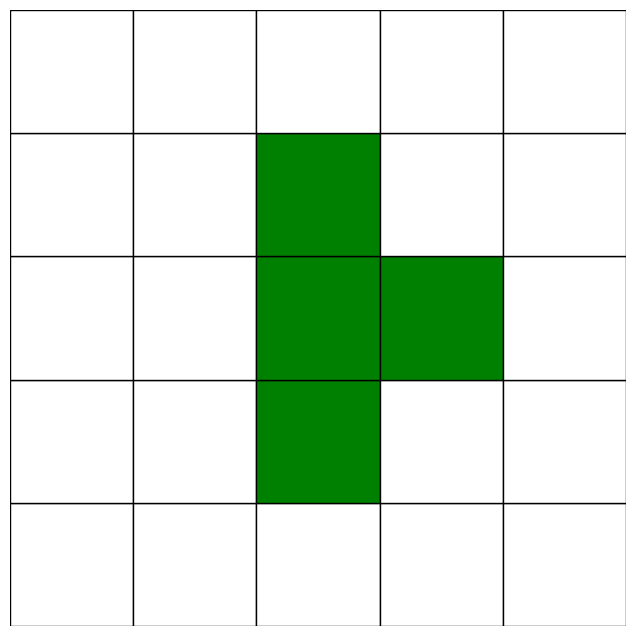

State after 5 steps (Printed):
0 0 1 0 0 
---------
0 1 0 1 0 
---------
1 0 0 0 1 
---------
0 1 0 1 0 
---------
0 0 1 0 0 
---------
State after 5 steps (Illustrated):


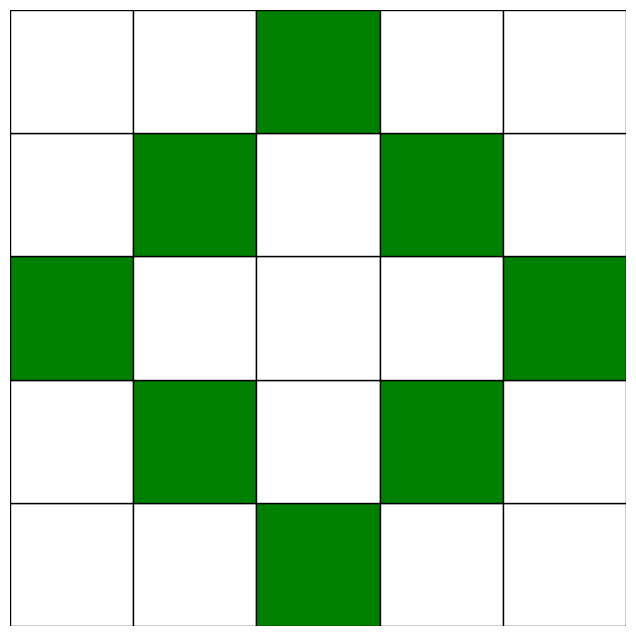

In [42]:
# Create an instance of the GameOfLife class with a 5x5 grid
game = GameOfLife(5, 5)

# Populate the grid with an initial configuration
initial_config = [(1, 2), (2, 2), (2, 3), (3, 2)]
game.populate_grid(initial_config)

# Print the initial state of the grid
print("Initial State (Printed):")
game.print_grid()

# Draw the initial state of the grid
print("Initial State (Illustrated):")
game.draw_grid()

# Make 5 steps in the game
game.make_n_steps(5)

# Print the state of the grid after 5 steps
print("State after 5 steps (Printed):")
game.print_grid()

# Draw the state of the grid after 5 steps
print("State after 5 steps (Illustrated):")
game.draw_grid()

In [43]:
game = GameOfLife(5, 5)
help(game.populate_grid)

Help on method populate_grid in module __main__:

populate_grid(coord) method of __main__.GameOfLife instance
    Populates the game grid with live cells at the specified coordinates.
    
    Parameters:
    coord (list of tuples): A list of 2D coordinates, each represented as a tuple (row, column), 
                            where live cells should be placed.
    
    Returns:
    list: The updated life_grid with the new live cells.



In [44]:
# Import necessary libraries
import time

# Create a GameOfLife object with a 30x30 grid
game = GameOfLife(30, 30)

# Populate the grid with the specified live cells
initial_configuration = [(14, 15), (15, 15), (16, 15), (15, 14), (16, 16), (14, 16), (15, 17)]
game.populate_grid(initial_configuration)

# Keep track of the previous state to check for a steady state
previous_state = game.get_grid()

# Run the game until it reaches a steady state
while True:
    game.make_step()
    current_state = game.get_grid()

    # Check if the current state matches the previous state (steady state)
    if current_state == previous_state:
        break

    # Update the previous state
    previous_state = current_state

# Get the final pattern of live and dead cells
final_pattern = game.get_grid()

# Print the final pattern (you can also visualize it with draw_grid)
print("Final Pattern:")
for row in final_pattern:
    for cell in row:
        if cell == 1:
            print("O", end=' ')  # Live cell
        else:
            print(".", end=' ')  # Dead cell
    print()

Final Pattern:
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . O . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . O . O . . . . . . . . . . . . . 
. . . . . . . . . . . . . . O . O . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . O . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . O O . . . . . . . O O . . . . . . . . . 
. . . . . . . . . O . . O . . . . . O . . O . . . . . . . . 
. . . . .

In [46]:
# Create a GameOfLife object with a 30x30 grid
game = GameOfLife(30, 30)

# Populate the grid with the specified live cells
initial_configuration = [(14, 15), (15, 15), (16, 15), (15, 14), (16, 16), (14, 16), (15, 17)]
game.populate_grid(initial_configuration)

# Keep track of the previous state to check for a steady state
previous_state = game.get_grid()

# Initialize a step counter
steps = 0

# Run the game until it reaches a steady state
while True:
    game.make_step()
    current_state = game.get_grid()

    # Check if the current state matches the previous state (steady state)
    if current_state == previous_state:
        break

    # Update the previous state
    previous_state = current_state

    # Increment the step counter
    steps += 1

# Get the final pattern of live and dead cells
final_pattern = game.get_grid()

# Print the number of steps and the final pattern
print(f"Steps to reach a steady state: {steps}")
print("Final Pattern:")
for row in final_pattern:
    for cell in row:
        if cell == 1:
            print("O", end=' ')  # Live cell
        else:
            print(".", end=' ')  # Dead cell
    print()

Steps to reach a steady state: 16
Final Pattern:
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . O . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . O . O . . . . . . . . . . . . . 
. . . . . . . . . . . . . . O . O . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . O . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . O O . . . . . . . O O . . . . . . . . . 
. . . . . . . . . O . . O . . . . . 

In [47]:
# Create a GameOfLife object with a 30x30 grid
game = GameOfLife(30, 30)

# Populate the grid with the specified live cells
initial_configuration = [(10, 10), (10, 13), (11, 14), (12, 10), (12, 14), (13, 11), (13, 12), (13, 13), (13, 14)]
game.populate_grid(initial_configuration)

# Run the game for 12 steps
for _ in range(12):
    game.make_step()

# Get the final pattern of live and dead cells
final_pattern = game.get_grid()

# Print the final pattern (you can also visualize it with draw_grid)
print("Final Pattern after 12 steps:")
for row in final_pattern:
    for cell in row:
        if cell == 1:
            print("O", end=' ')  # Live cell
        else:
            print(".", end=' ')  # Dead cell
    print()

Final Pattern after 12 steps:
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . O . . O . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . O . . . . . . . . . 
. . . . . . . . . . . . . . . . O . . . O . . . . . . . . . 
. . . . . . . . . . . . . . . . . O O O O . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . .

In [48]:
# Create a GameOfLife object with a 30x30 grid
game = GameOfLife(30, 30)

# Populate the grid with the specified live cells
initial_configuration = [
    (14, 16), (15, 16), (16, 16), (18, 16), (19, 16), (20, 16),
    (16, 14), (16, 15), (16, 17), (16, 18),
    (18, 14), (18, 15), (18, 17), (18, 18),
    (14, 18), (15, 18), (16, 18), (18, 18), (19, 18), (20, 18)
]
game.populate_grid(initial_configuration)

# Initialize a step counter
steps = 0

# Run the game until all living cells have died
while True:
    game.make_step()
    current_state = game.get_grid()
    steps += 1

    # Check if all cells have died (grid is all zeros)
    if all(cell == 0 for row in current_state for cell in row):
        break

print(f"Number of steps for all living cells to die: {steps}")


Number of steps for all living cells to die: 6
